In [19]:
import torch


## 基本使用
创建一个矩阵. 生成一个tensor一个矩阵计算单元.

```python
### 0纬标量
a = torch.tensor(2,2)
a.shape # torch.size([])

### 一维标量(张量)
torch.tensor([1.1]) # tensor([1.1000])

torch.tensor([1.1, 2.2]) # 一维的张亮
torch.FloatTensor(1) # 随机出是一个长度为1 的向量
torch.FloatTensor(2) # tensor([3.123e-25, 4.5935e-41])

data=np.ones(2)
torch.from_numpy(data) # 将numpy转换为torch的tensor

## 获取长度
a = torch.ones(2)
a.shape # 获取形状 torch.size([2])

a = torch.randn(2,3) # 2行3列的数据
a.shape # torch.size([2,3])

a.size(0) # 2
a.size(1) # 3
a.shape[1] # 3

## 基本操作

a = torch.rand(1,2,3) # 3维的数据tensor([[[...]]])
a.shape # torch.Size([1,2,3])


## 4维适合图片
a = torch.rand(2,3,28,28) # 2个图片, 每个图片3各通道 28*28
a[0] # 获取第一张图片

## 
a.numel() # 获取数据大小, 2x3x28x28 内存大小

a.dim() # 数据维度

```

In [20]:
x = torch.empty(5, 3)
x


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

创建一个随机矩阵

In [21]:
x = torch.rand(5, 3)
x


tensor([[0.1107, 0.1877, 0.4203],
        [0.0684, 0.3864, 0.9011],
        [0.9199, 0.7657, 0.7367],
        [0.7840, 0.4721, 0.7770],
        [0.5672, 0.8139, 0.6677]])

创建一个全零矩阵

In [22]:
x = torch.zeros(5, 3)
x


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

直接传入数据

In [23]:
x = torch.tensor([5.5, 3])
x


tensor([5.5000, 3.0000])

创建一个全1的矩阵

In [24]:
x = torch.ones(5, 3, dtype=torch.double)  # 类型是double
x = torch.randn_like(x, dtype=torch.float)
x


tensor([[-0.5607, -0.7254,  0.4328],
        [-0.0619, -0.1240, -0.8223],
        [-0.7475, -0.6366, -1.9925],
        [ 0.3631,  0.9454,  0.5187],
        [ 0.9116, -0.7669, -0.5843]])

显示矩阵大小

In [25]:
x.size()


torch.Size([5, 3])

计算

In [26]:
y = torch.rand(5, 3)
x + y  # torch.add(x,y)


tensor([[-0.3665,  0.0613,  0.8953],
        [ 0.5126,  0.3929, -0.6094],
        [-0.6991, -0.4866, -1.9647],
        [ 0.6069,  1.1183,  1.0745],
        [ 1.3125, -0.0456,  0.3654]])

索引

In [27]:
a = torch.rand(4, 3, 28, 28)
print(a[0].shape)
print(a[0, 0].shape)
print(a[0, 0, 2, 4])  # 返回标量


torch.Size([3, 28, 28])
torch.Size([28, 28])
tensor(0.0501)


切片

In [28]:
x[:, 1]


tensor([-0.7254, -0.1240, -0.6366,  0.9454, -0.7669])

In [29]:
print(a[:2].shape)  # 从开始到第二张图片, 不包含第二张图片.
print(a[:2, :1, :, :].shape)  # 从开始到第二张图片的第一个颜色通道, : 表示获取全部
print(a[:2, 1:, :, :].shape)  # 从开始到第二张图片的第一个通道后面的颜色通道, : 表示获取全部
print(a[:2, -1:, :, :].shape)  # 从开始到第二张图片的最后一个通道 (从倒数第一个到最后一个)
print(a[:, :, ::2, ::2].shape)  # 所有图片, 所有通道, 每一个图片横向每隔2个点取一个, 纵向每隔两个点取一个


torch.Size([2, 3, 28, 28])
torch.Size([2, 1, 28, 28])
torch.Size([2, 2, 28, 28])
torch.Size([2, 1, 28, 28])
torch.Size([4, 3, 14, 14])


In [30]:
# 不规则采样
a.index_select(0, torch.tensor([0, 2])).shape  # 第一个维度采样


torch.Size([2, 3, 28, 28])

In [31]:
print(a.index_select(2, torch.arange(8)).shape)


torch.Size([4, 3, 8, 28])


In [32]:
# 任意多的维度
print(a[...].shape)  # 取所有的维度, 类似于javascript的 {...,proj}
print(a[0, ...].shape)
print(a[:, 1, ...].shape)


torch.Size([4, 3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([4, 28, 28])


In [33]:
# 掩码索引
x = torch.randn(3, 4)
mask = x.ge(0.5)  # 获取大于等于0.5的矩阵
mask


tensor([[False,  True, False, False],
        [False,  True, False,  True],
        [False, False,  True, False]])

In [34]:
torch.masked_select(x, mask)  # 直接获取满足mask的数据


tensor([0.5466, 0.5430, 0.6332, 0.6789])

In [35]:
# take
src = torch.tensor([[4, 3, 5], [6, 7, 8]])
# 将数据flatern, 然后直接获取list中的数据
torch.take(src, torch.tensor([0, 2, 5]))


tensor([4, 5, 8])

view可以改变矩阵的维度

rand和randn的区别在于随机出来的数字
- rand 随机出来的数字是均匀分布的
- randn 随机出来的数字是正态分布的

In [36]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # -1表示自动计算维度
print(x.size(), y.size(), z.size())


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [37]:
# 正态分布
torch.normal(mean=torch.full([10], 0.0), std=torch.arange(1.0, 0.0, -0.1))


tensor([-1.3758, -2.2452,  0.7844,  0.1207, -0.0840,  0.0589, -0.1131, -0.4516,
        -0.0988, -0.0664])

In [38]:
torch.full([2, 3], 9)  # 生成矩阵


tensor([[9, 9, 9],
        [9, 9, 9]])

In [39]:
torch.full([2], 7)  # 两个7的数列


tensor([7, 7])

In [40]:
torch.arange(0, 10)  # 1-10


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
# 等差数列切分
torch.linspace(0, 10, steps=4)


tensor([ 0.0000,  3.3333,  6.6667, 10.0000])

In [42]:
# 10的0次方, 然后log递减
torch.logspace(0, -1, steps=10)


tensor([1.0000, 0.7743, 0.5995, 0.4642, 0.3594, 0.2783, 0.2154, 0.1668, 0.1292,
        0.1000])

In [43]:
# 对轴矩阵
# 超越正方形大小的用0填充
torch.eye(3)


tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [44]:
torch.eye(3, 5)


tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [45]:
# 随机打散, 一般用来做索引的种子
torch.randperm(10)


tensor([3, 0, 2, 9, 6, 7, 8, 4, 1, 5])

与numpy协同

In [46]:
a = torch.ones(5)
b = a.numpy()
b


array([1., 1., 1., 1., 1.], dtype=float32)

In [47]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
b


tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [48]:
a = np.ones([2, 3])
b = torch.from_numpy(a)


In [49]:
# 使用list进行导入
torch.tensor([2.0, 3.2])  # 小写的接受真是的数据, 大写的接受数据的维度


tensor([2.0000, 3.2000])

In [50]:
torch.FloatTensor([2.0, 3.2])  # 可以使用小写的代替, 很容易混淆


tensor([2.0000, 3.2000])

In [51]:
torch.tensor([1.2, 3]).type()  # 默认使用的是floattensor

# 设置默认tensortype, 一般增强学习的时候会用, 精度会跟高, 但是计算更耗时
torch.set_default_tensor_type(torch.DoubleTensor)


## 常见的tenser格式
- scalar
- vector
- matrix
- n-dimensional tensor

### Scalar
通常就是一个简单的数值

In [52]:
from torch import tensor

x = tensor(42)
x


tensor(42)

In [53]:
x.dim()  # 查看维度


0

In [54]:
2 * x  # 运算操作
x.mul(2)  # 和上面一样


tensor(84)

In [55]:
x.item()  # 获取原始数据


42

In [56]:
# matmul 矩阵相乘, 注意mm()方法只适合二位数组, 因此, 尽量使用matmul()
a = torch.tensor([[3, 3], [3, 3]])
b = torch.tensor([[1, 1], [1, 1]])
a.matmul(b)


tensor([[6, 6],
        [6, 6]])

In [57]:
a@b  # matmul() 等同


tensor([[6, 6],
        [6, 6]])

In [58]:
# 神经网络线性层
# 我们有4个照片 拉平以后成为了784个
x = torch.rand(4, 784)
w = torch.rand(512, 784)  # 一个784*512的矩阵, 注意这里使用的pytorch的写法, 输出在前面, 所以下面的需要转置
(x @ w.t()).shape  # 注意转置只适合于二维. 这就是前向传播


torch.Size([4, 512])

> 注意: 多维矩阵相乘只会对最后一个维度进行矩阵相乘, 这也是我们需要的.

In [59]:
# 平方
a = torch.full([2, 2], 3)
print(a)
print(a.pow(2))
print(a**2)
print(a**3)
print(a**0.5)
print(a.sqrt())


tensor([[3, 3],
        [3, 3]])
tensor([[9, 9],
        [9, 9]])
tensor([[9, 9],
        [9, 9]])
tensor([[27, 27],
        [27, 27]])
tensor([[1.7321, 1.7321],
        [1.7321, 1.7321]])
tensor([[1.7321, 1.7321],
        [1.7321, 1.7321]])


In [60]:
# exp e的n次方
a = torch.exp(torch.ones(2, 2))
print(a)
print(torch.log(a))


tensor([[2.7183, 2.7183],
        [2.7183, 2.7183]])
tensor([[1., 1.],
        [1., 1.]])


In [61]:
a = torch.tensor(3.14)
print(a.floor(), a.ceil(), a.trunc(), a.frac(), a.round())


tensor(3.) tensor(4.) tensor(3.) tensor(0.1400) tensor(3.)


### vector
向量, 一般表示这某一个特征,比如 [0,1,2,3]

In [62]:
v = tensor([1.5, -0.5, 3])
v


tensor([ 1.5000, -0.5000,  3.0000])

In [63]:
v.dim()


1

In [64]:
v.size()


torch.Size([3])

### Matrix
一般都是矩阵, 通常都是多维的

In [65]:
M = tensor([[1, 2], [3, 4]])  # 直接传入一个list就可以
M


tensor([[1, 2],
        [3, 4]])

In [66]:
3 * M  # 简单的标量乘法, 每一个都乘一遍


tensor([[ 3,  6],
        [ 9, 12]])

In [67]:
M.matmul(M)  # 矩阵乘法, 和numpy的@还有matmul方法作用相同. 需要满足乘法要求


tensor([[ 7, 10],
        [15, 22]])

In [68]:
tensor([1, 0]).matmul(M)


tensor([1, 2])

维度挤压和维度扩张 (Squeeze)

In [69]:
# unsqueeze新增维度
a = torch.rand(4, 3, 28, 28)
print(a.shape)
# 在第0个维度上添加一个维度
print(a.unsqueeze(0).shape)  # 添加了一个新的维度 (就是外面增加了一个中括号[...])
print(a.unsqueeze(-1).shape)  # 最后一个数据上增加一个新的维度

b = torch.rand(32)
b = b.unsqueeze(1).unsqueeze(2).unsqueeze(0)
print(b.shape)


torch.Size([4, 3, 28, 28])
torch.Size([1, 4, 3, 28, 28])
torch.Size([4, 3, 28, 28, 1])
torch.Size([1, 32, 1, 1])


In [70]:
print(b.squeeze().shape)
print(b.squeeze(0).shape)
print(b.squeeze(-1).shape)
print(b.squeeze(1).shape)  # 维度不能被挤压, 因为有数据
print(b.squeeze(-4).shape)


torch.Size([32])
torch.Size([32, 1, 1])
torch.Size([1, 32, 1])
torch.Size([1, 32, 1, 1])
torch.Size([32, 1, 1])


维度扩展, 比如维度0的数据从1增加到4, 这里的数据进行了复制

In [71]:
a = torch.rand(4, 32, 14, 14)
print(b.shape)  # torch.Size([1, 32, 1, 1])
print(b.expand(4, 32, 14, 14).shape)
print(b.expand(-1, -1, -1, 14).shape)  # -1表示保持不变


torch.Size([1, 32, 1, 1])
torch.Size([4, 32, 14, 14])
torch.Size([1, 32, 1, 14])


Repeat

In [72]:
print(b.shape)  # torch.Size([1, 32, 1, 1])
print(b.repeat(2, 2, 2, 2).shape)  # 每一个维度的数据进行重复, 所有维度的数据数量加倍


torch.Size([1, 32, 1, 1])
torch.Size([2, 64, 2, 2])


Transpose 维度交换, 将两个维度的大小交换

注意, 维度必须好好跟踪, 否则就会出现维度丢失

In [73]:
a = torch.rand(4, 3, 32, 32)
print(a.shape)
# contiguous 将数据变为连续型数据, 然后就可以进行拉伸操作, 然后在重新合并, 注意这样会丢掉原始数据的顺序
a1 = a.transpose(1, 3).contiguous().view(4, 3 * 32 * 32).view(4, 3, 32, 32)
a2 = (
    a.transpose(1, 3)
    .contiguous()
    .view(4, 3 * 32 * 32)
    .view(4, 32, 32, 3)
    .transpose(1, 3)
)
print(a1.shape)
print(a2.shape)
# 对比两个矩阵的数据是否相同
print(torch.all(torch.eq(a, a1)))
print(torch.all(torch.eq(a, a2)))  # 可以看到a2才和a相同, 数据结构没有丢失, 维度必须好好跟踪


torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
tensor(False)
tensor(True)


Permute

Transpose使用是两两交换, permute就是直接定义顺序, 更加强大更加便捷

In [74]:
a = torch.rand(4, 3, 28, 28)
print(a.transpose(1, 3).shape)
b = torch.rand(4, 3, 28, 32)
print(b.transpose(1, 3).shape)
print(b.transpose(1, 3).transpose(1, 2).shape)
print(b.permute(0, 2, 3, 1).shape)  # 直接对数据进行顺序定义


torch.Size([4, 28, 28, 3])
torch.Size([4, 32, 28, 3])
torch.Size([4, 28, 32, 3])
torch.Size([4, 28, 32, 3])


Broadcast 扩张, 和expand相似, 且不需要考虑数据

插入一个新的维度, 然后扩张成为相同的大小. 可以考虑使用unsqueeze 然后使用expand

![4](./assets/4.png)

比如, 我们有4个班, 每个班32个学生, 8门课. 我们尝试给每一个人的每一个课都加5分. 数据就是 [4,32,8] 来加一个5. 我们希望直接使用相加来操作, 但是不能, 因为矩阵结构不同, 因此我们需要用unsqueeze来进行维度增加, 然后expand. 而如果我们使用repeat, 我们的5就变成了一个巨大的矩阵, 内存小号扩大了一千倍.

此时我们就可以使用braodcast, 但是我们需要注意, **在最小的维度上必须相同**, 比如我们上面的例子, 我们需要扩展的维度必须是8, 因为这是最细粒度的维度.


In [75]:
# 有一个feature map 4个feature map, 每一个featuremap有32个channel, 然后大小为14*14
a = torch.rand(4, 32, 14, 14)
# 现在我们需要对32个channel添加偏置参数b, 此时我们的偏执参数为 [1,32,1,1]
b = torch.rand(1, 32, 1, 1)  # => [4,32,14,14]
c = torch.rand(14, 14)  # => [1,1,14,14] => [4,32,14,14]
d = torch.rand(2, 32, 14, 14)  # 维度不同, 不能实现broadcast, 必须手动修改第一个维度


合并和拆分

In [76]:
# concat
a = torch.rand(4, 32, 8)
b = torch.rand(5, 32, 8)
print(torch.cat([a, b], dim=0).shape)  # 在0维度上合并, 其他维度大小必须相同

# stack
a = torch.rand(4, 3, 16, 32)
b = torch.rand(4, 3, 16, 32)
# 新建一个维度, 然后堆叠, stack 堆叠维度必须一样 torch.Size([4, 3, 2, 16, 32])
print(torch.stack([a, b], dim=2).shape)

# split 根据长度拆分
a = torch.rand(32, 8)
b = torch.rand(32, 8)
c = torch.stack([a, b], dim=0)
aa, bb = c.split([1, 1], dim=0)  # 可以使用不均匀拆分[2,1], 按长度来拆分, 总和需要和目标相同
print(aa.shape, bb.shape)
aa, bb = c.split(1, dim=0)  # 按数量来拆分, 均匀拆分
print(aa.shape, bb.shape)


torch.Size([9, 32, 8])
torch.Size([4, 3, 2, 16, 32])
torch.Size([1, 32, 8]) torch.Size([1, 32, 8])
torch.Size([1, 32, 8]) torch.Size([1, 32, 8])


In [78]:
# Clamp
# 梯度裁剪, 一般梯度会很大很大, 可以打印梯度的膜, 一般10-100是比较合适的
grad = torch.rand(2, 3)*15
print(grad.max())
print(grad.median())
print(grad.clamp(10))  # 小于10的值直接使用10来代替
print(grad.clamp(10, 12))  # 小于10的为10, 大于12的为12


tensor(11.1780)
tensor(2.4246)
tensor([[10.0000, 10.0000, 11.1780],
        [10.0000, 10.0000, 10.0000]])
tensor([[10.0000, 10.0000, 11.1780],
        [10.0000, 10.0000, 10.0000]])


Tensor的统计属性.

norm, mean, sum, prod, max, min argmin, argmax, kthvalue, topk

矩阵范数（matrix norm）亦译矩阵模是数学中矩阵论、线性代数、泛函分析等领域中常见的基本概念，是将一定的矩阵空间建立为赋范向量空间时为矩阵装备的范数。应用中常将有限维赋范向量空间之间的映射以矩阵的形式表现，这时映射空间上装备的范数也可以通过矩阵范数的形式表达。

![5](./assets/5.jpeg)

In [84]:
# 矩陣範數 norm, 注意不是normalize.

a = torch.full([8], 1.)
b = a.view(2, 4)
c = a.view(2, 2, 2)
print(a)
print(b)
print(c)

print(a.norm(1), b.norm(1), c.norm(1))
print(a.norm(2), b.norm(2), c.norm(2))  # 2范数:元素绝对值得平方和开根号

print(b.norm(1, dim=1))  # 对第二个维度求norm, b的维度是[2,4], 就是对4这个维度求norm

print(c.norm(1, dim=0))  # 对第一个维度norm, 第一个维度的数据就会消失


tensor([1., 1., 1., 1., 1., 1., 1., 1.])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])
tensor(8.) tensor(8.) tensor(8.)
tensor(2.8284) tensor(2.8284) tensor(2.8284)
tensor([4., 4.])
tensor([[2., 2.],
        [2., 2.]])


In [87]:
a = torch.arange(8).view(2, 4).float()
print(a.min(), a.max(), a.mean(), a.prod())  # prod 就是都乘起来, 因为有一个0所以结果是0

print(a.argmax(), a.argmin())  # 返回最大值最小值所在的索引

a = a.view(1, 2, 4)

print(a.argmax())
print(a.argmin())

a = torch.rand(2, 3, 4)
print(a.argmax())  # 默认就是拉平为一维的数据, 然后输出

a = torch.randn(4, 10)
print(a.argmax(dim=1))  # 分别求每列的max index


tensor(0., dtype=torch.float32) tensor(7., dtype=torch.float32) tensor(3.5000, dtype=torch.float32) tensor(0., dtype=torch.float32)
tensor(7) tensor(0)
tensor(7)
tensor(0)
tensor(0)
tensor([5, 8, 4, 8])


In [94]:

a = torch.randn(4, 10)

print(a.max(dim=1))  # 比如神经网络输出一个tensor,可以直接获得最大的概率的位置
print(a.argmax(dim=1))

# 一般情况下, 对矩阵求出了最大值会消掉一个维度, 添加了keepdim以后 返回结果的维度和之前一样
print(a.max(dim=1, keepdim=True))
print(a.argmax(dim=1, keepdim=True))
print(a.argmax(dim=1).shape)
print(a.argmax(dim=1, keepdim=True).shape)


torch.return_types.max(
values=tensor([2.7879, 2.4704, 1.2700, 1.8708]),
indices=tensor([1, 0, 3, 9]))
tensor([1, 0, 3, 9])
torch.return_types.max(
values=tensor([[2.7879],
        [2.4704],
        [1.2700],
        [1.8708]]),
indices=tensor([[1],
        [0],
        [3],
        [9]]))
tensor([[1],
        [0],
        [3],
        [9]])
torch.Size([4])
torch.Size([4, 1])


In [96]:
# top-k, k-th
a = torch.randn(4, 10)
print(a.topk(3, dim=1))  # 在第一个维度上获取最大的3个数
print(a.topk(3, dim=1, largest=False))  # 在第一个维度上获取最小的3个数


print(a.kthvalue(8))  # 排序以后获取从小到大的第8个的值, 注意这是第8小的, 是从小到大
print(a.kthvalue(8, dim=1))  # 一共10个数, 第8小就是第三大


torch.return_types.topk(
values=tensor([[1.1128, 0.7538, 0.4773],
        [1.1944, 0.6687, 0.6043],
        [2.3688, 1.1367, 0.9782],
        [0.8497, 0.4598, 0.4395]]),
indices=tensor([[8, 9, 3],
        [8, 9, 7],
        [5, 0, 4],
        [3, 0, 6]]))
torch.return_types.topk(
values=tensor([[-1.0601, -0.9480, -0.8149],
        [-1.2304, -0.6507, -0.6449],
        [-0.5055, -0.4560, -0.4210],
        [-1.7395, -0.8612, -0.5169]]),
indices=tensor([[2, 1, 6],
        [5, 2, 1],
        [6, 8, 3],
        [4, 2, 7]]))
torch.return_types.kthvalue(
values=tensor([0.4773, 0.6043, 0.9782, 0.4395]),
indices=tensor([3, 7, 4, 6]))


In [99]:
print(a > 0)  # 这里返回大于
print(a.gt(0))
print(torch.gt(a, 0))

print(a.equal(a))  # 返回TrueFalse
print(torch.eq(a, a))  # 返回矩阵
print(torch.equal(a, a))  # 返回TrueFalse


tensor([[False, False, False,  True, False, False, False, False,  True,  True],
        [False, False, False,  True,  True, False,  True,  True,  True,  True],
        [ True,  True,  True, False,  True,  True, False,  True, False,  True],
        [ True, False, False,  True, False, False,  True, False,  True, False]])
tensor([[False, False, False,  True, False, False, False, False,  True,  True],
        [False, False, False,  True,  True, False,  True,  True,  True,  True],
        [ True,  True,  True, False,  True,  True, False,  True, False,  True],
        [ True, False, False,  True, False, False,  True, False,  True, False]])
tensor([[False, False, False,  True, False, False, False, False,  True,  True],
        [False, False, False,  True,  True, False,  True,  True,  True,  True],
        [ True,  True,  True, False,  True,  True, False,  True, False,  True],
        [ True, False, False,  True, False, False,  True, False,  True, False]])
True
tensor([[True, True, True, True,

In [100]:
# Where, 三元简单使用
# torch.where(condition,x,y) -> tensor
cond = torch.tensor([[0.6769, 0.7271], [0.8884, 0.4163]])
a = torch.zeros(2, 2)
b = torch.ones(2, 2)

print(a, b, cond)

print(torch.where(cond > 0.5, a, b))  # 大于0.5的时候使用1的位置, 其他情况使用b的位置得值


tensor([[0., 0.],
        [0., 0.]]) tensor([[1., 1.],
        [1., 1.]]) tensor([[0.6769, 0.7271],
        [0.8884, 0.4163]])
tensor([[0., 0.],
        [0., 1.]])


gather 查表, 比如有一个list, 然后从torch中的index进行查表操作
比如enum是[dog,cat,whale], tensor是[0,1,0,2], 那么结果就应该是[dog,cat,dog,whale]

`torch.gather(input,dim,index,out=None) -> Tensor`

神经网络输出可以使用查表来进行比对, 可以快速查询

In [103]:

prob = torch.randn(4, 10)
idx = prob.topk(dim=1, k=3)
idx = idx[1]
print(idx)  # 得到4个维度中前3大的数字的index
label = torch.arange(10) + 10086  # enum的表格, 也就是一个list
print(torch.gather(label.expand(4, 10), dim=1, index=idx.long()))  # 根据enum输出


tensor([[9, 7, 0],
        [4, 0, 8],
        [8, 2, 3],
        [5, 2, 1]])
tensor([[10095, 10093, 10086],
        [10090, 10086, 10094],
        [10094, 10088, 10089],
        [10091, 10088, 10087]])


Tensor 的简单理解:

![image](./assets/2.png)

### hub模块
调用别人已经训练好的模型.

<https://pytorch.org/hub/research-models>

<https://github.com/pytorch/hub>

下面就调用一下模型. 下载一个文件来进行边框检测. 

![image](./assets/deeplab1.png)

In [ ]:
import torch

model = torch.hub.load("pytorch/vision:v0.10.0",
                       "deeplabv3_resnet50", pretrained=True)
model.eval()


Using cache found in /Users/shuowang/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /Users/shuowang/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:05<00:00, 28.4MB/s] 


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
# Download an example image from the pytorch website
import urllib

url, filename = (
    "https://github.com/pytorch/hub/raw/master/images/deeplab1.png",
    "assets/deeplab1.png",
)
try:
    urllib.URLopener().retrieve(url, filename)
except:
    urllib.request.urlretrieve(url, filename)


In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[
                             0.229, 0.224, 0.225]),
    ]
)

input_tensor = preprocess(input_image)
# create a mini-batch as expected by the model
input_batch = input_tensor.unsqueeze(0)

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to("cuda")
    model.to("cuda")

with torch.no_grad():
    output = model(input_batch)["out"][0]
output_predictions = output.argmax(0)


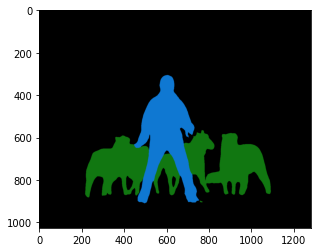

In [ ]:
# create a color pallette, selecting a color for each class
import matplotlib.pyplot as plt
palette = torch.tensor([2**25 - 1, 2**15 - 1, 2**21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()
                    ).resize(input_image.size)
r.putpalette(colors)


plt.imshow(r)
plt.show()
